In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 300)

In [2]:
columnNames = ['age', 'workclass', 'fnlwgt', 'education', 'educationNum', 'marital', 'occupation', 'relationship', 'race', 'sex', 'capitalGain', 'capitalLoss', 'hoursPerWeek', 'nativeCountry', 'income']
columnsToUse = ['age', 'workclass', 'fnlwgt', 'educationNum', 'marital', 'relationship', 'race', 'sex', 'capitalGain', 'capitalLoss', 'nativeCountry', 'hoursPerWeek', 'income']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None, names=columnNames, sep=',\s+')
df = df.loc[:, columnsToUse]
#df = df[df.loc[:,'workclass']!='?']
#df = df[df.loc[:,'nativeCountry']!='?']
inc = {'<=50K':0, '>50K':1}
s = {'Male':0, 'Female':1}
df.replace({'income':inc, 'sex':s}, inplace=True)
df.head()

C:\Users\Jun Seo\Anaconda3\envs\venv\lib\site-packages\ipykernel\__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


,age,workclass,fnlwgt,educationNum,marital,relationship,race,sex,capitalGain,capitalLoss,nativeCountry,hoursPerWeek,income
0,39,State-gov,77516,13,Never-married,Not-in-family,White,0,2174,0,United-States,40,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Husband,White,0,0,0,United-States,13,0
2,38,Private,215646,9,Divorced,Not-in-family,White,0,0,0,United-States,40,0
3,53,Private,234721,7,Married-civ-spouse,Husband,Black,0,0,0,United-States,40,0
4,28,Private,338409,13,Married-civ-spouse,Wife,Black,1,0,0,Cuba,40,0


In [3]:
df2 = pd.get_dummies(df)
df2.head()

,age,fnlwgt,educationNum,sex,capitalGain,capitalLoss,hoursPerWeek,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital_Divorced,marital_Married-AF-spouse,marital_Married-civ-spouse,marital_Married-spouse-absent,marital_Never-married,marital_Separated,marital_Widowed,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,nativeCountry_?,nativeCountry_Cambodia,nativeCountry_Canada,nativeCountry_China,nativeCountry_Columbia,nativeCountry_Cuba,nativeCountry_Dominican-Republic,nativeCountry_Ecuador,nativeCountry_El-Salvador,nativeCountry_England,nativeCountry_France,nativeCountry_Germany,nativeCountry_Greece,nativeCountry_Guatemala,nativeCountry_Haiti,nativeCountry_Holand-Netherlands,nativeCountry_Honduras,nativeCountry_Hong,nativeCountry_Hungary,nativeCountry_India,nativeCountry_Iran,nativeCountry_Ireland,nativeCountry_Italy,nativeCountry_Jamaica,nativeCountry_Japan,nativeCountry_Laos,nativeCountry_Mexico,nativeCountry_Nicaragua,nativeCountry_Outlying-US(Guam-USVI-etc),nativeCountry_Peru,nativeCountry_Philippines,nativeCountry_Poland,nativeCountry_Portugal,nativeCountry_Puerto-Rico,nativeCountry_Scotland,nativeCountry_South,nativeCountry_Taiwan,nativeCountry_Thailand,nativeCountry_Trinadad&Tobago,nativeCountry_United-States,nativeCountry_Vietnam,nativeCountry_Yugoslavia
0,39,77516,13,0,2174,0,40,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,0,13,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,0,40,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,1,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
logreg = LogisticRegression()
X1 = df2
y = df2.loc[:,'income']
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, random_state=13, test_size=0.2)
print("Train has " + str(X1_train.shape[0]) + " entries")
print("Test has " + str(X1_test.shape[0]) + " entries")

Train has 26048 entries
Test has 6513 entries


In [5]:
#logistic regression on train set
logreg.fit(X1_train, y_train)
y_pred = logreg.predict(X1_train)
print(pd.crosstab(y_train, y_pred, rownames=['Predicted Values'], colnames=['Actual Values']))
print('Logistic Regression yields %.4f' % (accuracy_score(y_train, y_pred)*100) + "% accuracy")

Actual Values         0     1
Predicted Values             
0                 19120   641
1                  4661  1626
Logistic Regression yields 79.6453% accuracy


In [6]:
#logistic regression on test set
y_pred_test = logreg.predict(X1_test)
print(pd.crosstab(y_test, y_pred_test, rownames=['Predicted Values'], colnames=['Actual Values']))
print('Logistic Regression yields %.4f' % (accuracy_score(y_test, y_pred_test)*100) + "% accuracy")

Actual Values        0    1
Predicted Values           
0                 4819  140
1                 1132  422
Logistic Regression yields 80.4698% accuracy


In [7]:
fpr, tpr, _ = roc_curve(y_pred_test, y_test)
auc = auc(fpr, tpr)
auc

0.78033477432244713

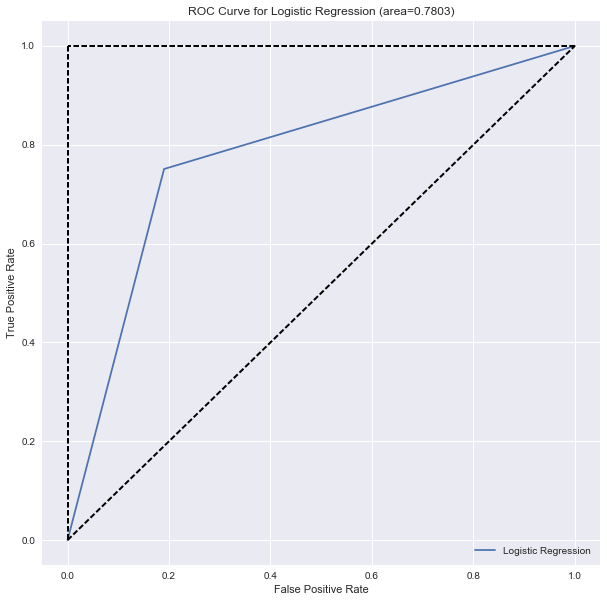

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', lw=2, color = 'black')
plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
plt.title("ROC Curve for Logistic Regression (area=%.4f)" % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.show()